# Heart Disease EDA

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.shape

(303, 14)

In [3]:
#Rename columns for better readability

df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())
df.head()

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age                             0
sex                             0
chest_pain_type                 0
resting_blood_pressure          0
cholestoral                     0
fasting_blood_sugar             0
resting_electrocardiographic    0
maximum_heart_rate              0
exercise_induced_angina         0
ST_depression                   0
slope_peak_exercise_ST          0
number_of_major_vessels         0
thal                            0
target                          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           303 non-null    int64  
 1   sex                           303 non-null    int64  
 2   chest_pain_type               303 non-null    int64  
 3   resting_blood_pressure        303 non-null    int64  
 4   cholestoral                   303 non-null    int64  
 5   fasting_blood_sugar           303 non-null    int64  
 6   resting_electrocardiographic  303 non-null    int64  
 7   maximum_heart_rate            303 non-null    int64  
 8   exercise_induced_angina       303 non-null    int64  
 9   ST_depression                 303 non-null    float64
 10  slope_peak_exercise_ST        303 non-null    int64  
 11  number_of_major_vessels       303 non-null    int64  
 12  thal                          303 non-null    int64  
 13  targe

In [6]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# replacing values
df['target'].replace([0, 1], ['Normal', 'Disease'],inplace=True)

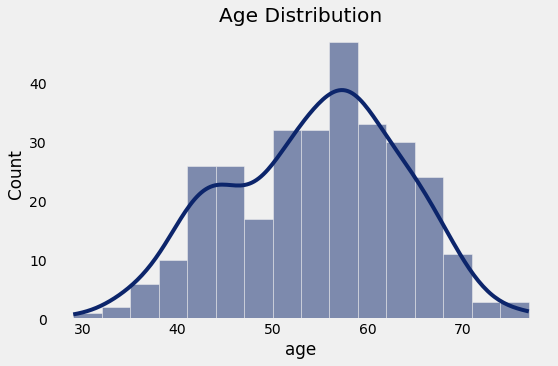

In [8]:
# visualization of age distributions 
plt.figure(figsize=(8,5))
plt.title("Age Distribution")
sns.histplot(x=df["age"], kde=True, bins="auto", binwidth=3, color="#0c256b")
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Disease/Normal People Distribution by Age')

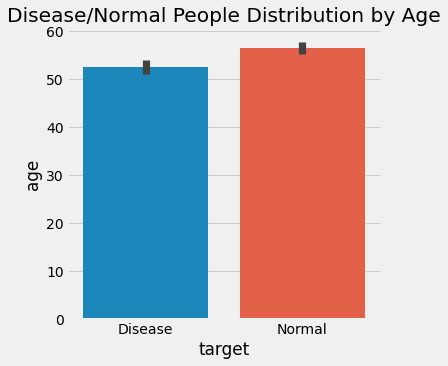

In [9]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df, y="age", x="target")
plt.title("Disease/Normal People Distribution by Age")

In [10]:
df.groupby("sex").mean()

,age,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal
sex,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966


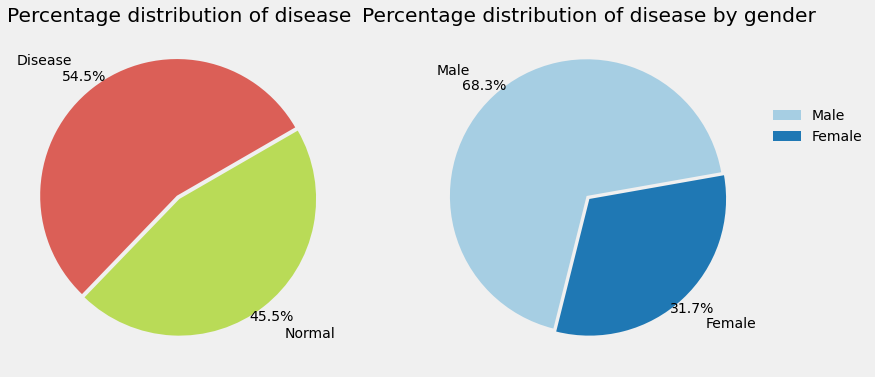

In [11]:
#Pie plot
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(df["target"].value_counts(), colors = sns.color_palette("hls",5), labels=["Disease","Normal"], autopct='%1.1f%%', startangle=30, pctdistance=1.1,labeldistance=1.25, explode=(0.03,0))
plt.title("Percentage distribution of disease")

#Pie plot
plt.subplot(122)
plt.pie(df["sex"].value_counts(), colors = sns.color_palette("Paired",5), labels=["Male","Female"], autopct='%1.1f%%', startangle=10, pctdistance=1.1,labeldistance=1.25, explode=(0.03,0))
plt.title("Percentage distribution of disease by gender")
plt.legend(frameon=False, bbox_to_anchor=(1,0.8))
plt.show()

<AxesSubplot:title={'center':'Heart Disease Correlation'}>

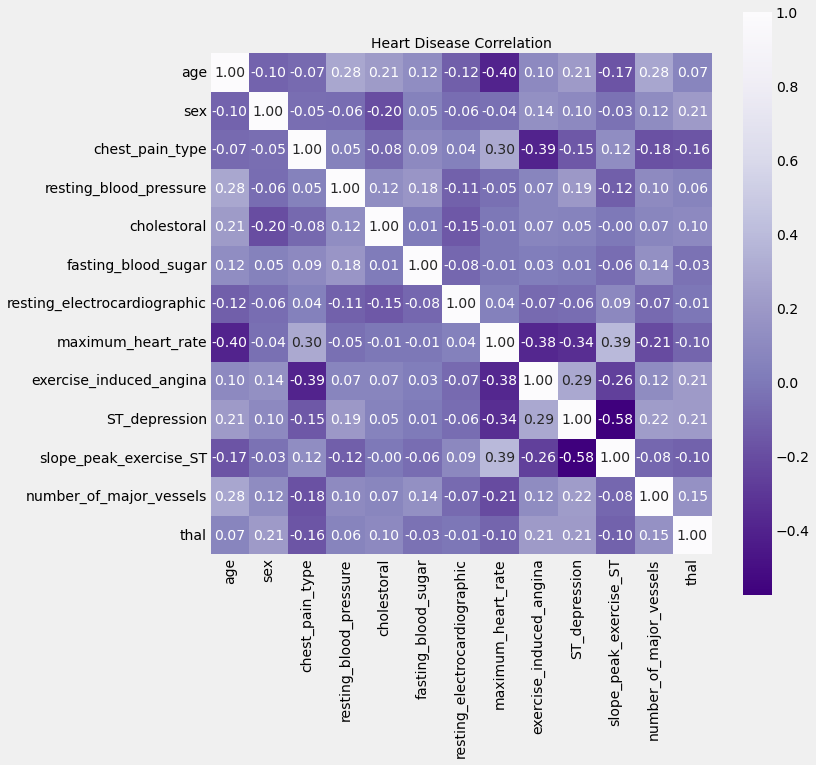

In [12]:
dataCorr = df.corr()
plt.figure(figsize=(10,10))
plt.title('Heart Disease Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Purples_r')